## Machine Learning Regression Model's implementation on Algerian Forest Fire dataset

### Algerian Forest Fire datasetAttribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

### Contents :

### 1. EDA ( Exploratort Data Analysis)

  ####  1.1 splitting data into numerical and categorical features for better analysis
  
  ####  1.2 Univariate Analysis on numerical data
  
  ####  1.3 Multivariate Analysis

### 2. FE (Feature Engineering )

  #### 2.1 Applying Label Encoding on categorical features
  
### 3. Model Training

  #### 3.1 Train and Test split of the data
  
  #### 3.2 Feature Scaling
  
  ####  3.3 Linear Regression
  
  ##### 3.3.1 Assumptions of Linear Regression¶
  
   ###### 3.3.1.1 Scatter Plot between Actual and Predicted Values
   
   ###### 3.3.1.2 Residuals of Actual and Predicted
   
   ###### 3.3.1.3 Histogram plot of residuals
   
   ###### 3.3.1.4 Scatter Plot with Predicted data and Residuals data

  ##### 3.3.2 Performance Metrics (Cost Function's)
  
  ##### 3.3.3 Rsqaure and adjusted R Squared Error (Model Validation metrics) 
  
  #### 3.4 Ridge Regression
  
  ##### 3.4.1 Assumptions of Ridge Regression¶
  
   ###### 3.4.1.1 Scatter Plot between Actual and Predicted Values
   
   ###### 3.4.1.2 Residuals of Actual and Predicted
   
   ###### 3.4.1.3 Histogram plot of residuals
   
   ###### 3.4.1.4 Scatter Plot with Predicted data and Residuals data

  ##### 3.4.2 Performance Metrics (Cost Function's)
  
  ##### 3.4.3 Rsqaure and adjusted R Squared Error (Model Validation metrics) 
  
  #### 3.5 Lasso Regression
  
  ##### 3.5.1 Assumptions of Lasso Regression¶
  
   ###### 3.5.1.1 Scatter Plot between Actual and Predicted Values
   
   ###### 3.5.1.2 Residuals of Actual and Predicted
   
   ###### 3.5.1.3 Histogram plot of residuals
   
   ###### 3.5.1.4 Scatter Plot with Predicted data and Residuals data

  ##### 3.5.2 Performance Metrics (Cost Function's)
  
  ##### 3.5.3 Rsqaure and adjusted R Squared Error (Model Validation metrics) 

  #### 3.6 Elastic Net Regression
  
  ##### 3.6.1 Assumptions of Elastic Net Regression¶
  
   ###### 3.6.1.1 Scatter Plot between Actual and Predicted Values
   
   ###### 3.6.1.2 Residuals of Actual and Predicted
   
   ###### 3.6.1.3 Histogram plot of residuals
   
   ###### 3.6.1.4 Scatter Plot with Predicted data and Residuals data

  ##### 3.6.2 Performance Metrics (Cost Function's)
  
  ##### 3.6.3 Rsqaure and adjusted R Squared Error (Model Validation metrics) 


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [190]:
algerian=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',skiprows=(0,124,125,126))

In [191]:
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#### Dataset is having two regions so adding a column to differentiate data based on region

In [192]:
algerian.loc[:121,'Region']='Bejaia'

In [193]:
algerian.loc[122:,'Region']='Sidi-Bel Abbes'

In [194]:
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


#### Column names were having spaces so removing them for smooth analysis

In [195]:
algerian.columns=[i.strip() for i in algerian.columns]

In [196]:
algerian.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [197]:
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


## 1. EDA ( Exploratort Data Analysis)

In [198]:
algerian.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [199]:
algerian.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object

In [200]:
algerian.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

### 1.1 splitting data into numerical and categorical features for better analysis

In [211]:
numerical=[each for each in algerian.columns if algerian[each].dtype!='object']
categorical=[each for each in algerian.columns if algerian[each].dtype=='object']

In [202]:
numerical

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'ISI',
 'BUI']

In [203]:
categorical

['DC', 'FWI', 'Classes', 'Region']

### 1.2 Univariate Analysis on numerical data

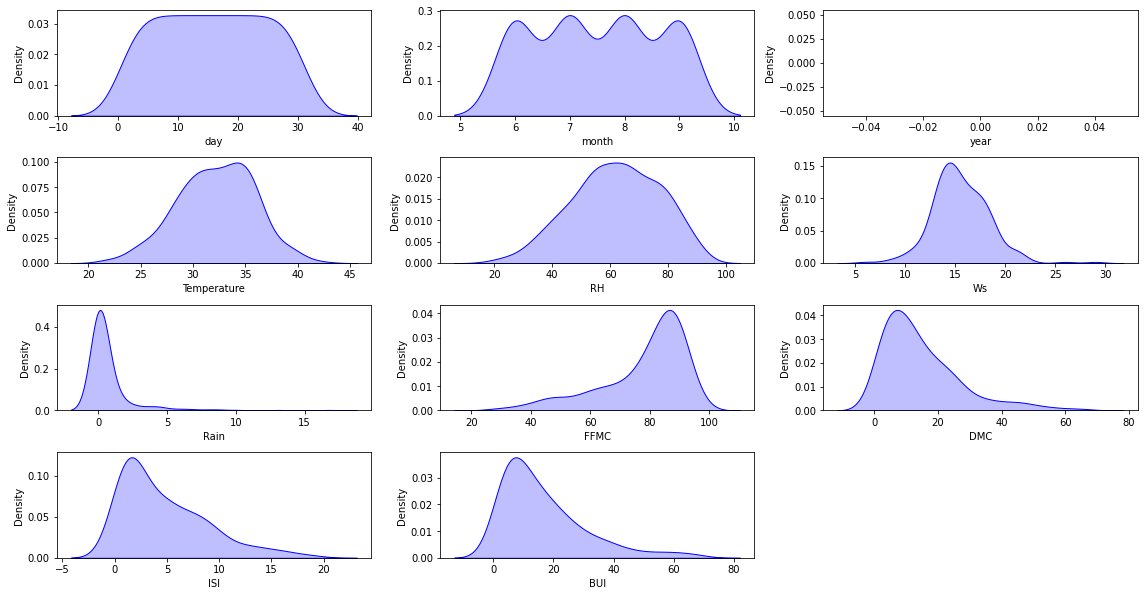

In [204]:
plt.figure(figsize=(16,10))
for i in range(len(numerical)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(algerian[numerical[i]],shade=True,color='b')
    plt.xlabel(numerical[i])
    plt.tight_layout()
    

Text(0.5, 0, 'Temperature')

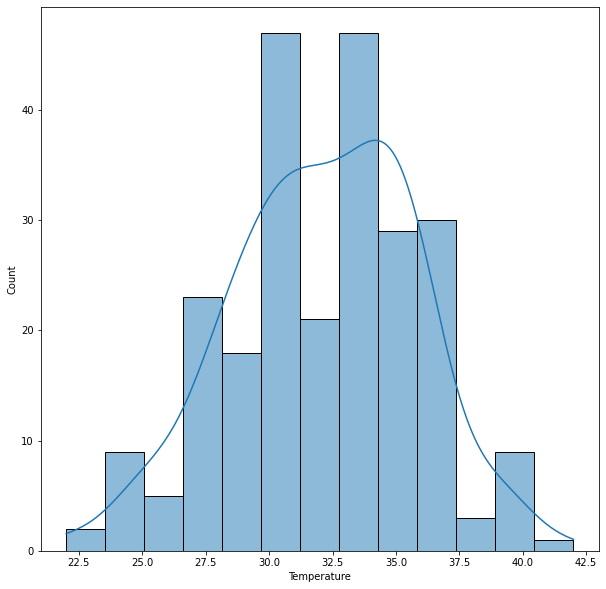

In [205]:
plt.figure(figsize=(10,10))
sns.histplot(algerian['Temperature'],kde=True)
plt.xlabel('Temperature')

#### Observation : Mostly temperature is in between 30.0 to 34

### Relation between Temperature and Rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

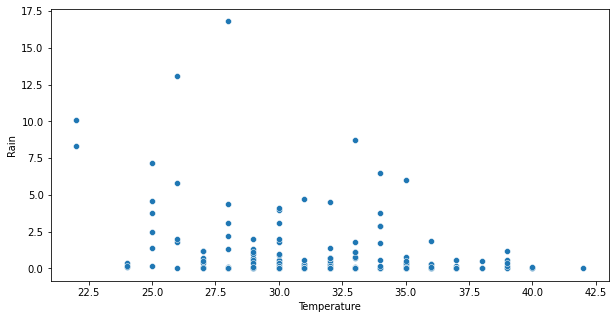

In [206]:
plt.figure(figsize=(10,5))
sns.scatterplot(algerian['Temperature'],algerian['Rain'])

#### Observation :

###### When temperature range is between 27.5 and 32.5 mostly rain occured

###### When temperature is between to 27.5 and 28.5 highest rainfall is reported

#### Highest Temperature for each region

In [207]:
algerian.groupby('Region')['Temperature'].max()

Region
Bejaia            37
Sidi-Bel Abbes    42
Name: Temperature, dtype: int64

#### Average Temperature for each region

In [208]:
algerian.groupby('Region')['Temperature'].mean()

Region
Bejaia            31.180328
Sidi-Bel Abbes    33.163934
Name: Temperature, dtype: float64

#### Highest Rainfall for each region

In [209]:
algerian.groupby('Region')['Rain'].max()

Region
Bejaia            16.8
Sidi-Bel Abbes     8.7
Name: Rain, dtype: float64

#### Average Rainfall for each region

In [210]:
algerian.groupby('Region')['Rain'].mean()

Region
Bejaia            0.842623
Sidi-Bel Abbes    0.678689
Name: Rain, dtype: float64

In [125]:
algerian.drop(['day','month','year'],inplace=True,axis=1)

##### Observation : Most of the times the rain fall is less than 1mm in each region

### 1.3 Multivariate Analysis 

<AxesSubplot:>

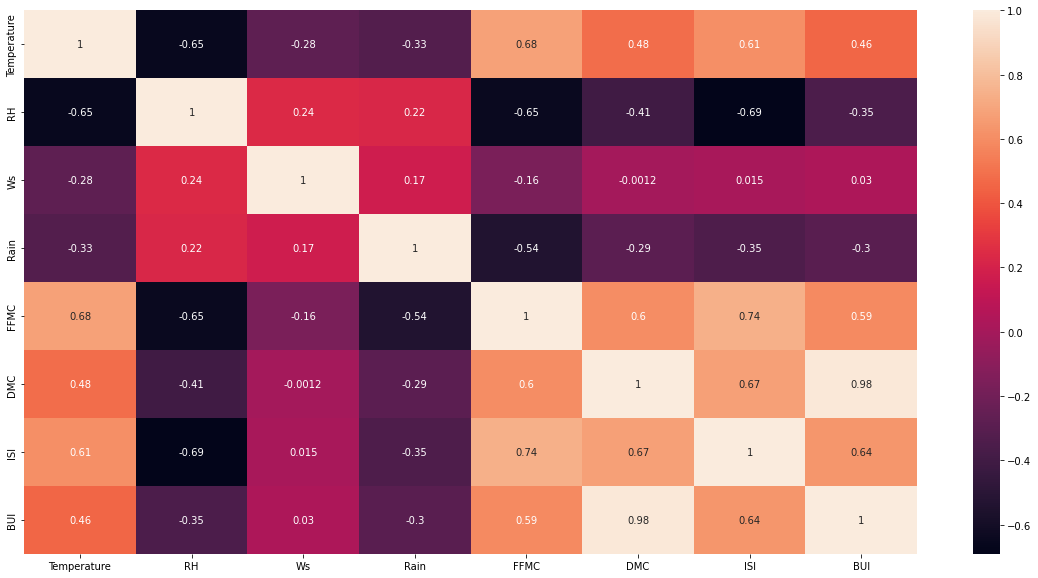

In [128]:
plt.figure(figsize=(20,10))
sns.heatmap(algerian[numerical].corr(),annot=True)

#### Observations : 

#### Temperature , FFMC , ISI are co related to each other

#### Temperature and RH are negatively co related to each other


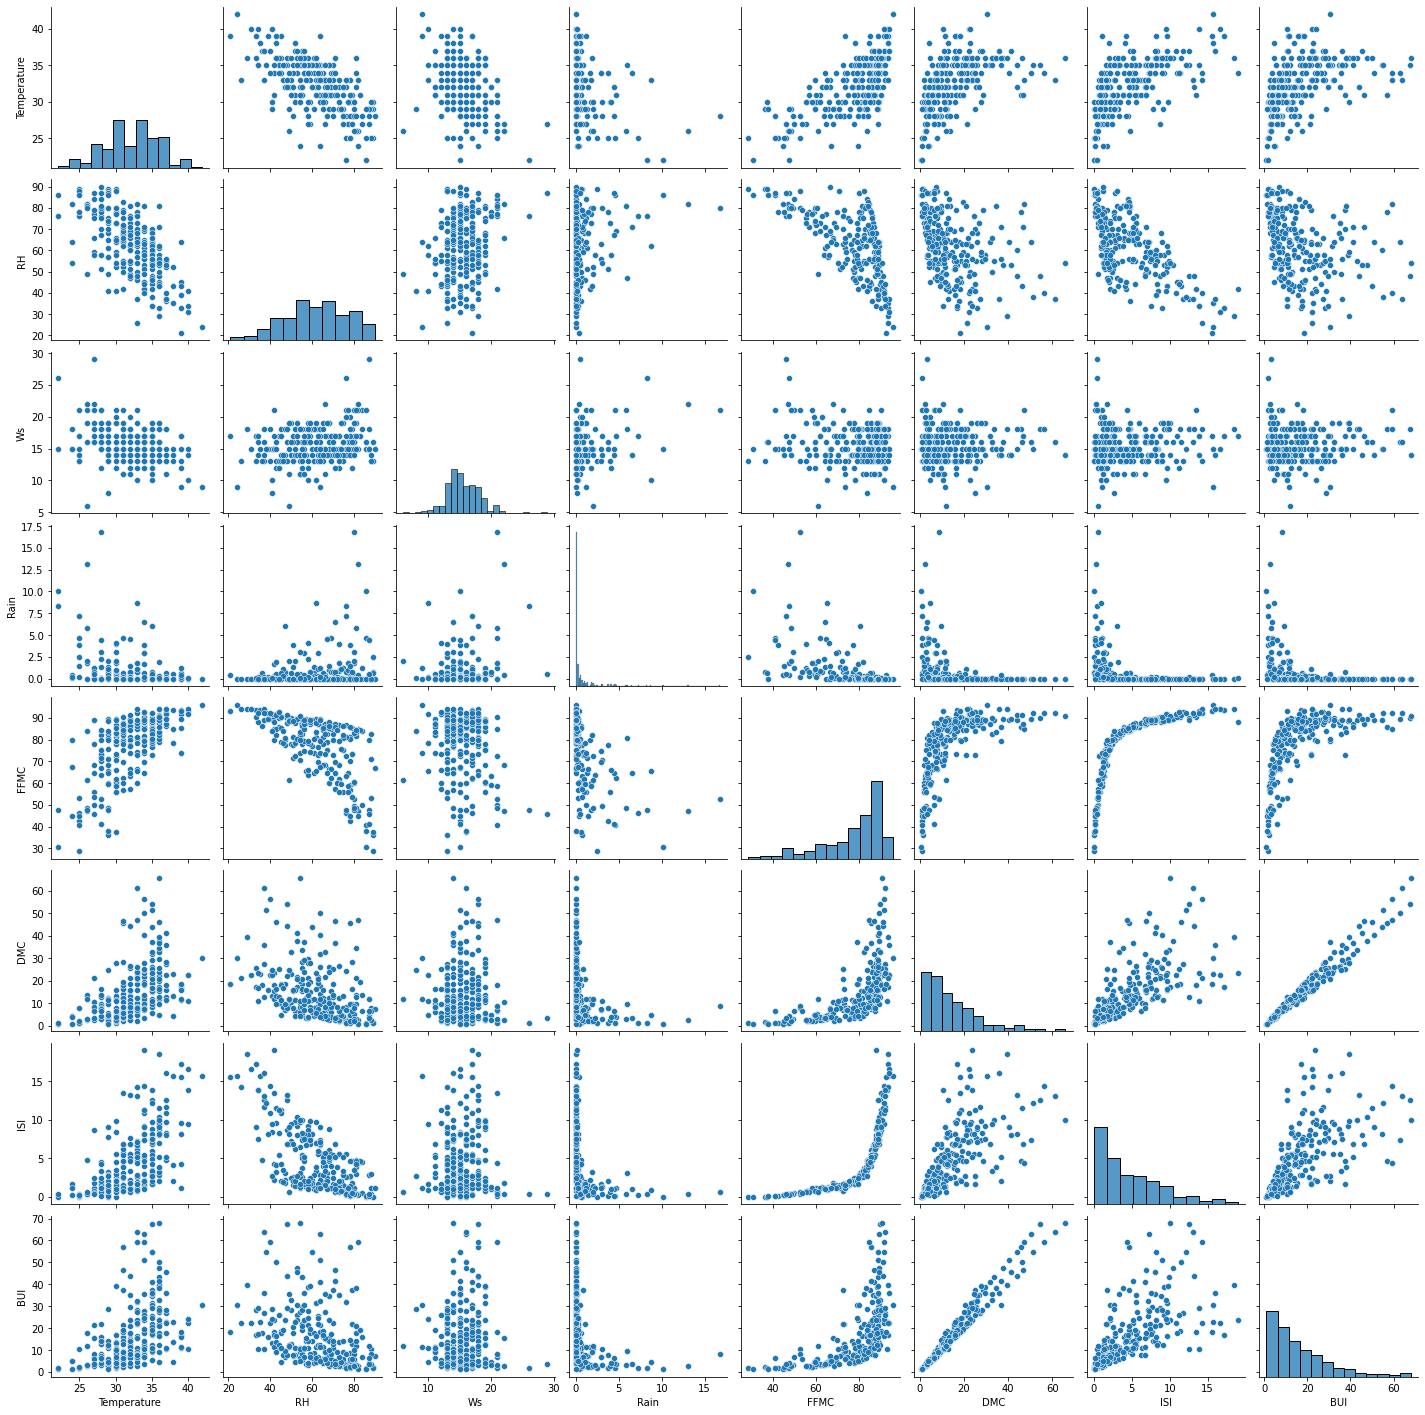

In [129]:
sns.pairplot(algerian[numerical])

### 2. Feature Engineering

In [130]:
algerian[categorical]

,DC,FWI,Classes,Region
0,7.6,0.5,not fire,Bejaia
1,7.6,0.4,not fire,Bejaia
2,7.1,0.1,not fire,Bejaia
3,6.9,0,not fire,Bejaia
4,14.2,0.5,not fire,Bejaia
...,...,...,...,...
239,44.5,6.5,fire,Sidi-Bel Abbes
240,8,0,not fire,Sidi-Bel Abbes
241,7.9,0.2,not fire,Sidi-Bel Abbes
242,15.2,0.7,not fire,Sidi-Bel Abbes


#### Removing spaces for Classes column in algerian

In [131]:
algerian['Classes']=algerian.Classes.str.strip()

#### 2.1 Applying Label Encoding on categorical features

In [132]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
algerian['DC']=label_encoder.fit_transform(algerian['DC'])
algerian['FWI']=label_encoder.fit_transform(algerian['FWI'])
algerian['Classes']=label_encoder.fit_transform(algerian['Classes'])
algerian['Region']=label_encoder.fit_transform(algerian['Region'])

In [133]:
algerian[categorical]

,DC,FWI,Classes,Region
0,150,5,1,0
1,150,4,1,0
2,146,1,1,0
3,136,0,1,0
4,18,5,1,0
...,...,...,...,...
239,112,106,0,1
240,164,0,1,1
241,153,2,1,1
242,25,7,1,1


In [134]:
algerian.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1,0
1,29,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1,0
2,26,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1,0
3,25,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1,0
4,27,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1,0


In [135]:
algerian.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### Observation : No null values

### 3. Model Training 

In [136]:
independent_features=[each for each in algerian.columns if each!='Temperature']

In [137]:
X=algerian[independent_features]
Y=algerian['Temperature']

In [138]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,150,1.3,3.4,5,1,0
1,61,13,1.3,64.4,4.1,150,1.0,3.9,4,1,0
2,82,22,13.1,47.1,2.5,146,0.3,2.7,1,1,0
3,89,13,2.5,28.6,1.3,136,0.0,1.7,0,1,0
4,77,16,0.0,64.8,3.0,18,1.2,3.9,5,1,0


In [139]:
Y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

### 3.1 Train and Test split of the data

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [141]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,54,11,0.5,73.7,7.9,82,1.2,9.6,7,1,0
65,65,13,0.0,86.8,11.1,80,5.2,11.5,103,0,0
132,42,21,0.0,90.6,18.2,83,13.4,18.0,49,0,1
207,40,18,0.0,92.1,56.3,30,14.3,59.5,90,0,1
162,56,15,2.9,74.8,7.1,185,1.6,6.8,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,147,0.2,1.4,0,1,0
14,80,17,3.1,49.4,3.0,148,0.4,3.0,1,1,0
92,76,17,7.2,46.0,1.3,149,0.2,1.8,1,1,0
179,57,16,0.0,87.5,15.7,98,6.7,15.7,119,0,1


In [142]:
Y_train

114    32
65     34
132    31
207    34
162    34
       ..
106    24
14     28
92     25
179    33
102    30
Name: Temperature, Length: 163, dtype: int64

In [143]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,64,15,0.0,86.7,14.2,141,5.7,18.3,117,0,0
6,54,13,0.0,88.2,9.9,83,6.4,10.9,111,0,0
153,48,16,0.0,87.6,7.9,43,6.8,7.8,105,0,1
211,53,17,0.5,80.2,20.7,24,2.7,30.6,101,0,1
198,41,10,0.1,92.0,22.6,142,9.5,24.2,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...
180,59,16,0.0,88.1,19.5,117,7.4,19.5,22,0,1
5,67,14,0.0,82.6,5.8,59,3.1,7.0,64,0,0
56,48,13,0.0,90.3,22.2,7,8.7,29.4,43,0,0
125,64,14,0.0,79.4,5.2,26,2.2,5.6,10,1,1


In [144]:
Y_test

24     31
6      33
153    33
211    35
198    40
       ..
180    34
5      31
56     36
125    30
148    36
Name: Temperature, Length: 81, dtype: int64

#### We use X_train and Y_train for training the different types of models and X_test and Y_test will be used to validate the model after training 

### 3.2 Feature Scaling

##### (Standardizing the data for a faster training of the model without disturbing the flavour of the data)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [146]:
X_train=scaler.fit_transform(X_train)


In [147]:
X_test=scaler.transform(X_test)

### 3.3 Linear Regression 

In [148]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [149]:
linear.fit(X_train,Y_train)

LinearRegression()

In [150]:
linear.coef_

array([-1.07802151, -0.47703815,  0.11727425,  1.69769244,  0.17295791,
       -0.11160847,  0.22557088,  0.18515143,  0.15475541,  0.33304075,
       -0.02433911])

In [151]:
linear.intercept_

31.98159509202454

In [152]:
linear_pred=linear.predict(X_test)

#### 3.3.1 Assumptions of Linear Regression 

#### 3.3.1.1  Scatter Plot between Actual and Predicted Values

Text(0, 0.5, 'Predicted Values')

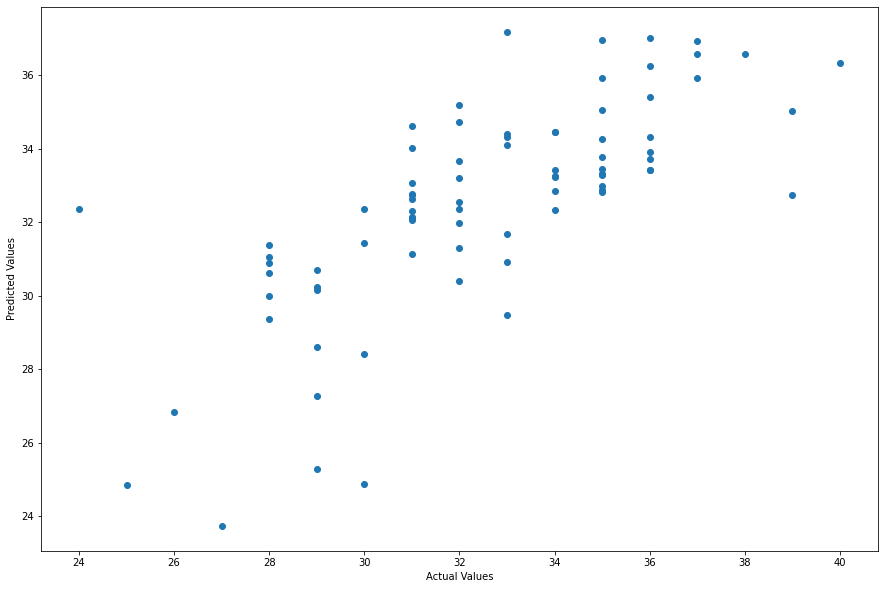

In [153]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,linear_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

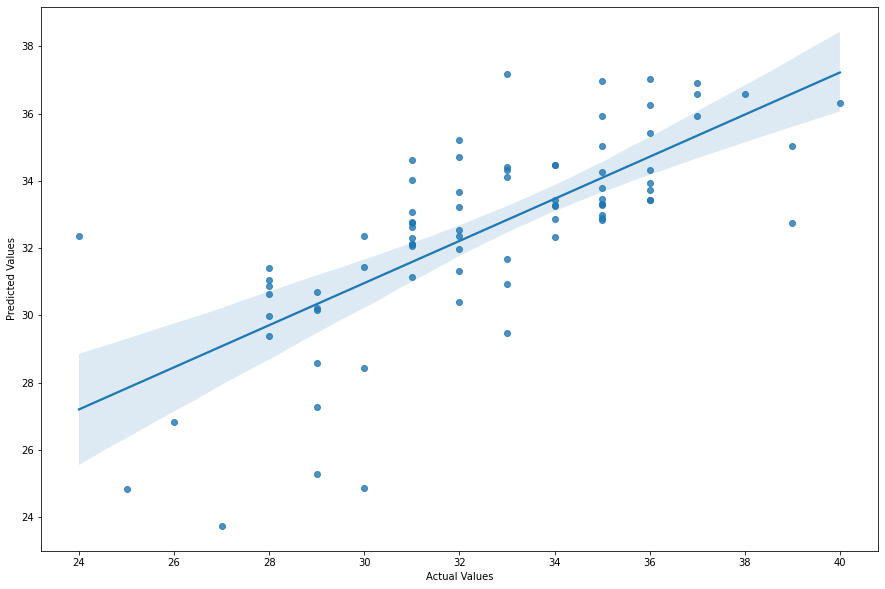

In [154]:
plt.figure(figsize=(15,10))
sns.regplot(Y_test,linear_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Observation : Linear relationship so the model is good

#### 3.3.1.2 Residuals of Actual and Predicted 

In [155]:
linear_residuals=Y_test-linear_pred
linear_residuals

24    -2.081462
6     -1.316126
153   -1.111257
211    2.001588
198    3.674676
         ...   
180    0.755670
5     -1.117685
56     0.589395
125   -2.365154
148    2.073871
Name: Temperature, Length: 81, dtype: float64

#### 3.3.1.3 Histogram plot of residuals 

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

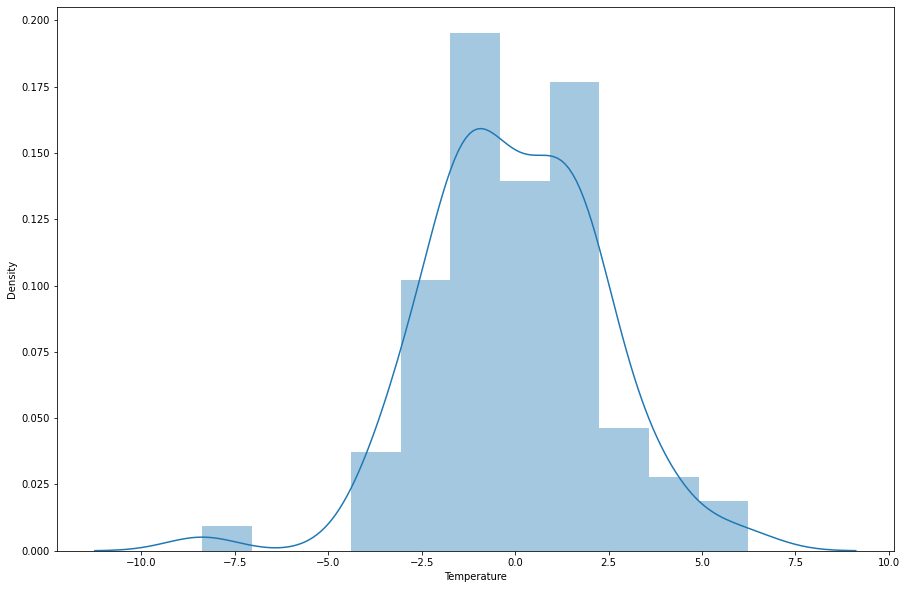

In [156]:
plt.figure(figsize=(15,10))
sns.distplot(linear_residuals,kde=True)

#### 3.3.1.4 Scatter Plot with Predicted data and Residuals data

Text(0, 0.5, 'Residuals')

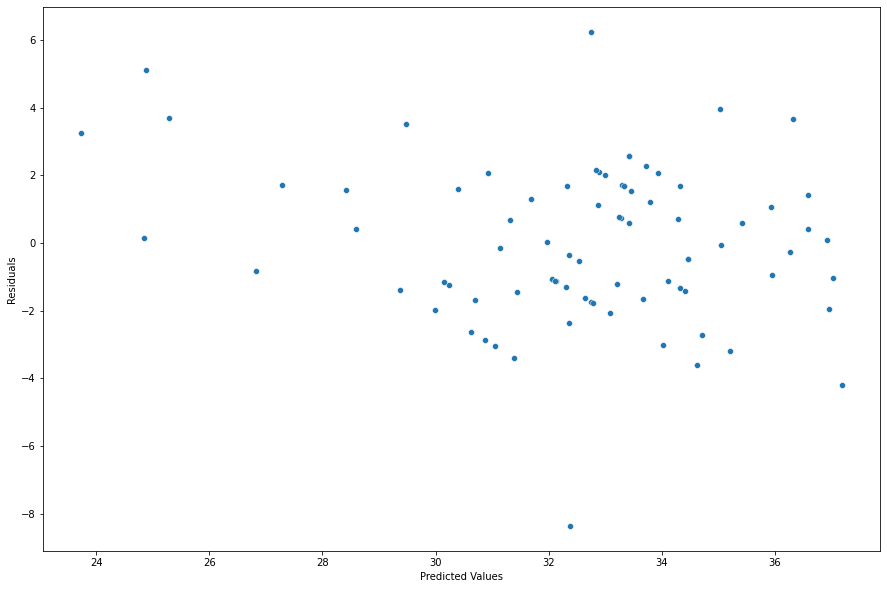

In [157]:
plt.figure(figsize=(15,10))
sns.scatterplot(linear_pred,linear_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

#### Observation : No shape for data it is called Uniform Distribution

### 3.3.2 Performance Metrics (Cost Function's)

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(linear_pred,Y_test))
print(mean_absolute_error(linear_pred,Y_test))
print(np.sqrt(mean_squared_error(linear_pred,Y_test)))

5.244419214511176
1.8201813913678182
2.2900696964309133


### 3.3.3 Rsqaure and adjusted R Squared Error (Model Validation metrics)

In [159]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,linear_pred)
score

0.5117264869248217

In [160]:
###Adjuested R square

1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.43388578194182226

### 3.4 Ridge Regression 

In [161]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [162]:
ridge.fit(X_train,Y_train)

Ridge()

In [163]:
ridge.intercept_

31.98159509202454

In [164]:
ridge.coef_

array([-1.08222623, -0.47378799,  0.10429379,  1.65115071,  0.18101204,
       -0.11622204,  0.22898333,  0.17941442,  0.15952385,  0.31032454,
       -0.02142012])

In [165]:
ridge_pred=ridge.predict(X_test)

#### 3.4.1 Assumptions of Linear Regression

#### 3.4.1.1  Scatter Plot between Actual and Predicted Values


Text(0, 0.5, 'Y Predicted Values')

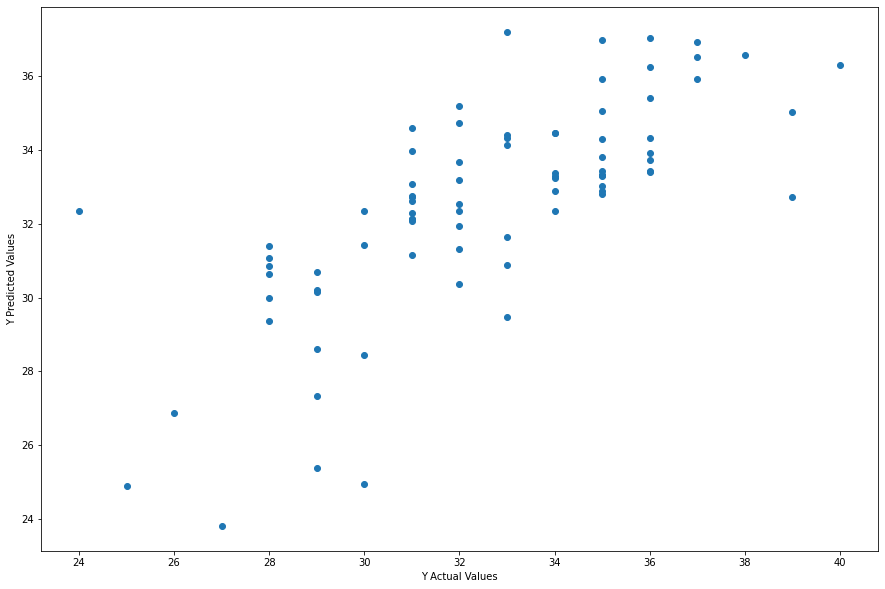

In [166]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,ridge_pred)
plt.xlabel("Y Actual Values")
plt.ylabel("Y Predicted Values")

#### 3.4.1.2 Regression Plot with Predicted data and Residuals data

Text(0, 0.5, 'Y Predicted Values')

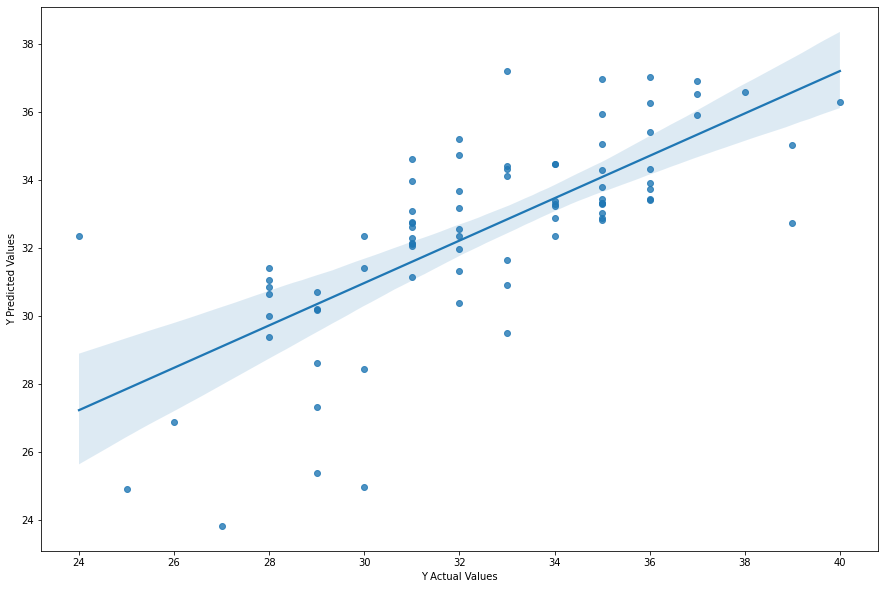

In [167]:
plt.figure(figsize=(15,10))
sns.regplot(Y_test,ridge_pred)
plt.xlabel("Y Actual Values")
plt.ylabel("Y Predicted Values")

### Observation : Linear relationship so the model is good

In [168]:
ridge_residuals=Y_test-ridge_pred
ridge_residuals

24    -2.078495
6     -1.313427
153   -1.124368
211    1.971253
198    3.691773
         ...   
180    0.759656
5     -1.122843
56     0.596695
125   -2.337349
148    2.079292
Name: Temperature, Length: 81, dtype: float64

#### 3.4.1.3 Histogram Plot for Residuals data

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

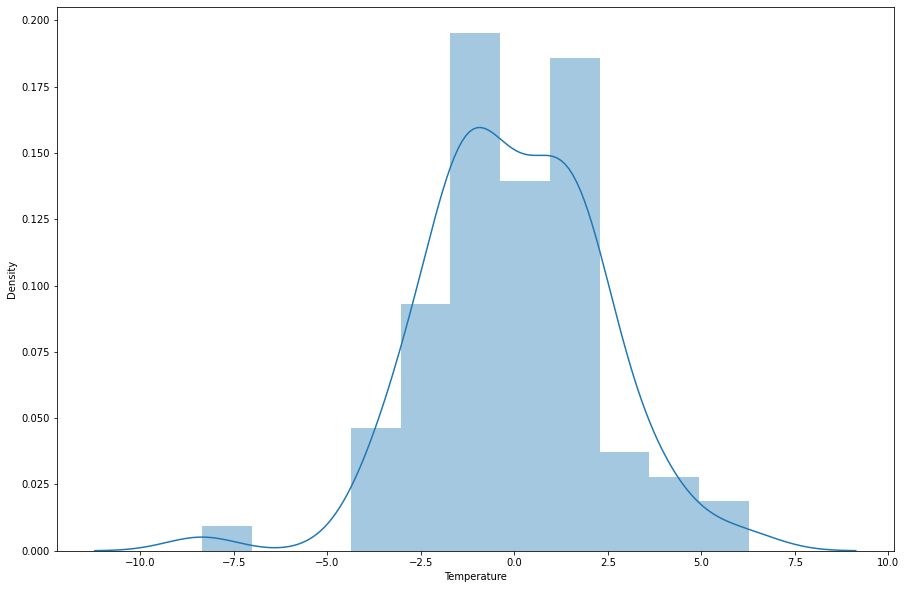

In [169]:
plt.figure(figsize=(15,10))
sns.distplot(ridge_residuals,kde=True)

#### 3.4.1.4 Scatter Plot with Predicted data and Residuals data

<AxesSubplot:ylabel='Temperature'>

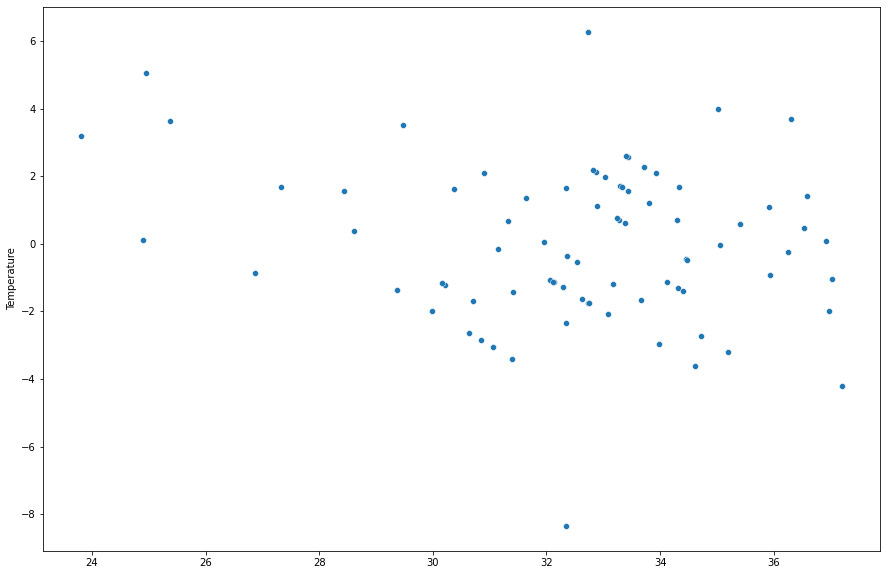

In [170]:
plt.figure(figsize=(15,10))
sns.scatterplot(ridge_pred,ridge_residuals)

#### Observation : No shape for data it is called Uniform Distribution

#### 3.4.2 Performance Metrics (Cost Function's)

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(ridge_pred,Y_test))
print(mean_absolute_error(ridge_pred,Y_test))
print(np.sqrt(mean_squared_error(ridge_pred,Y_test)))

5.218031594030461
1.8169420272740777
2.2843011171976566


#### 3.4.3 Rsqaure and adjusted R Squared Error (Model Validation metrics)


In [172]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
score

0.5141832653833709

In [173]:
###Adjuested R square

1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.4367342207343431

### 3.5 .Lasso Regression

In [174]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [175]:
lasso.fit(X_train,Y_train)

Lasso()

In [176]:
lasso.coef_

array([-0.62324302, -0.        , -0.        ,  1.25581509,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ])

In [177]:
lasso.intercept_

31.98159509202454

In [178]:
lasso_pred=lasso.predict(X_test)

In [179]:
lasso_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

#### 3.5.1 Assumptions of Linear Regression

#### 3.5.1.1  Scatter Plot between Actual and Predicted Values


Text(0, 0.5, 'Y Predicted Values')

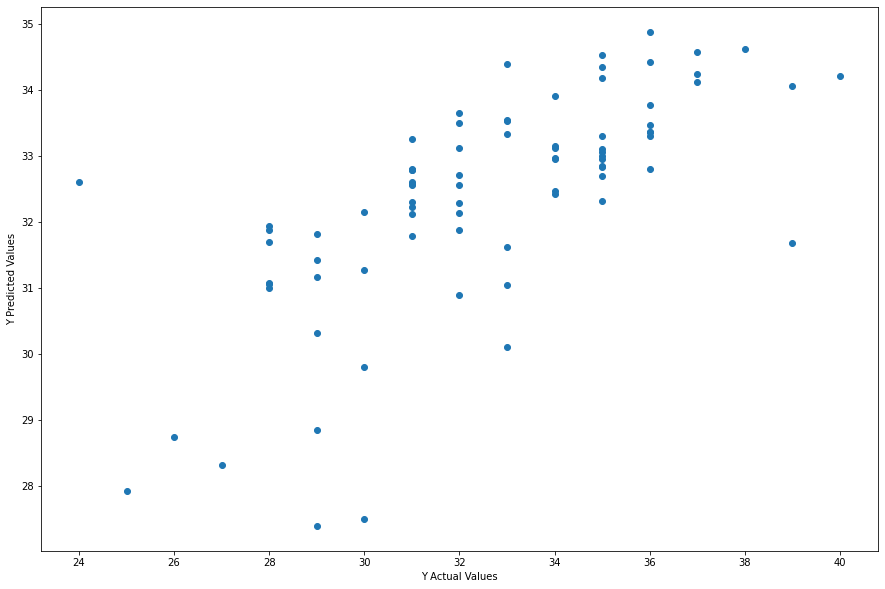

In [180]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,lasso_pred)
plt.xlabel("Y Actual Values")
plt.ylabel("Y Predicted Values")

#### 3.5.1.2 Regression Plot with Predicted data and Residuals data

Text(0, 0.5, 'Y Predicted Values')

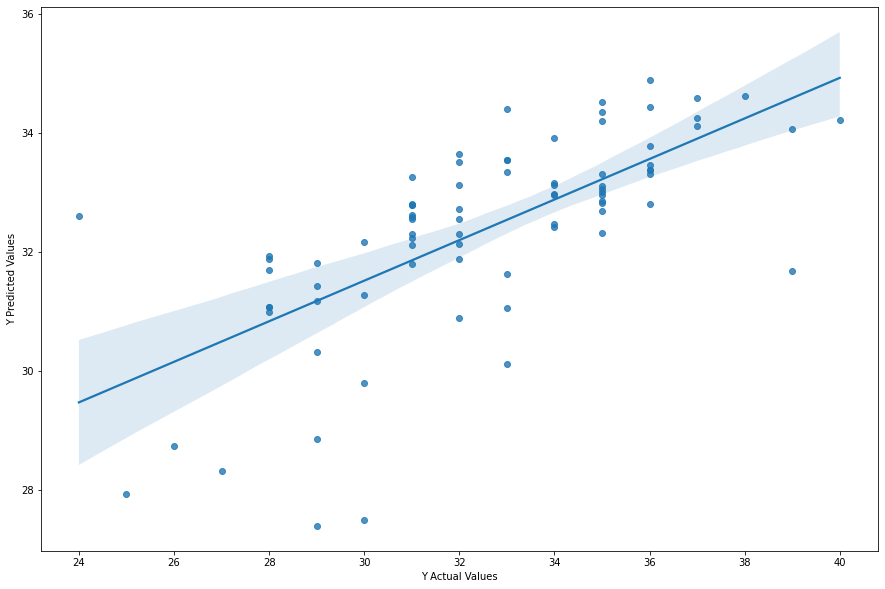

In [181]:
plt.figure(figsize=(15,10))
sns.regplot(Y_test,lasso_pred)
plt.xlabel("Y Actual Values")
plt.ylabel("Y Predicted Values")

#### Observation : Linear relationship so the model is good

In [182]:
lasso_residuals=Y_test-ridge_pred
lasso_residuals

24    -2.078495
6     -1.313427
153   -1.124368
211    1.971253
198    3.691773
         ...   
180    0.759656
5     -1.122843
56     0.596695
125   -2.337349
148    2.079292
Name: Temperature, Length: 81, dtype: float64

#### 3.5.1.3 Histogram Plot for Residuals data

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

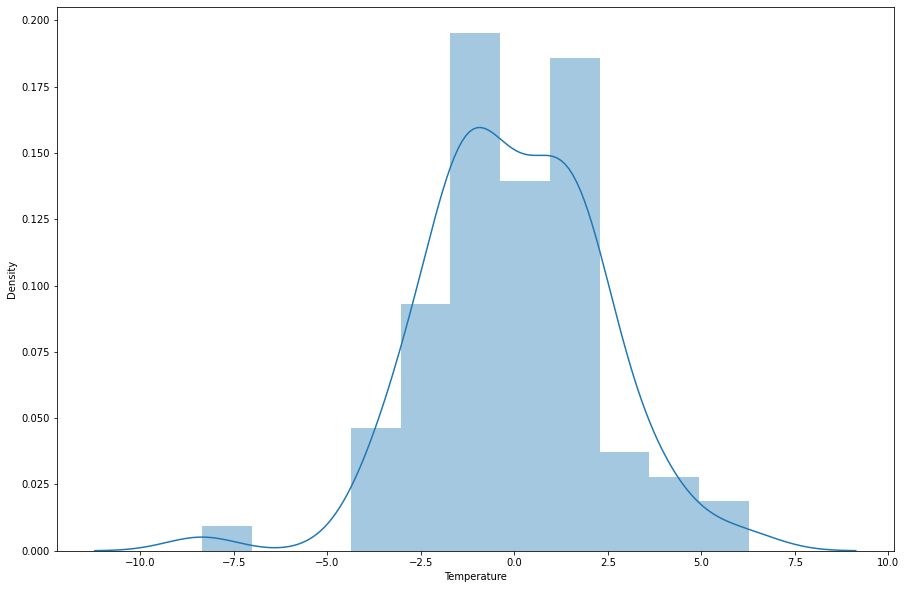

In [232]:
plt.figure(figsize=(15,10))
sns.distplot(lasso_residuals)

#### 3.5.1.4 Scatter Plot with Predicted data and Residuals data


<AxesSubplot:ylabel='Temperature'>

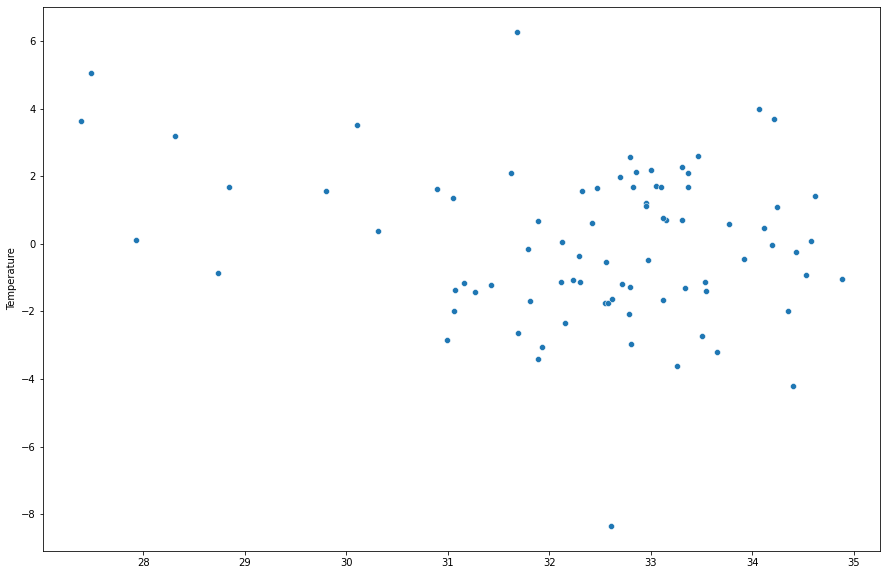

In [184]:
plt.figure(figsize=(15,10))
sns.scatterplot(lasso_pred,lasso_residuals)

#### 3.5.2 Performance Metrics (Cost Function's)


In [185]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(lasso_pred,Y_test))
print(mean_absolute_error(lasso_pred,Y_test))
print(np.sqrt(mean_squared_error(lasso_pred,Y_test)))

6.085458745527471
1.9978776414662665
2.4668722596696147


#### 3.4.3 Rsqaure and adjusted R Squared Error (Model Validation metrics)


In [187]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,lasso_pred)
score

0.4334228064508907

In [188]:
###Adjuested R square

1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.34309890603001825

### 3.6 .Elastic Net Regression

In [213]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [217]:
elastic.fit(X_train,Y_train)

ElasticNet()

In [218]:
elastic.coef_

array([-0.7008344 , -0.09820542, -0.00527302,  0.84558244,  0.13385765,
       -0.        ,  0.27975928,  0.05651448,  0.05957208, -0.07623463,
        0.        ])

In [219]:
elastic.intercept_

31.98159509202454

In [220]:
elastic_pred=elastic.predict(X_test)

In [221]:
elastic_pred

array([32.78137546, 33.3813912 , 33.50729995, 32.74620435, 34.61890467,
       31.57577429, 34.1547641 , 28.98204436, 30.71775448, 30.06616532,
       30.40527537, 32.3532567 , 32.4790282 , 32.11285102, 33.75029817,
       32.34720781, 35.47353695, 27.83707773, 32.20153859, 33.03646981,
       31.00362529, 29.62080869, 33.79383399, 30.08188894, 35.2859098 ,
       28.84309432, 32.4747831 , 32.78651042, 32.81379576, 34.10888365,
       33.42608113, 31.1782371 , 32.65209843, 32.98058046, 32.10585035,
       32.40026556, 30.81347089, 33.40437823, 31.0171527 , 27.96601631,
       32.90950685, 32.90478735, 32.278447  , 27.78802058, 34.63529472,
       32.48822936, 31.78887141, 30.72652578, 34.26658382, 33.69715518,
       35.47919251, 31.36783503, 31.66036713, 33.50209872, 33.53511563,
       32.2471452 , 35.92065061, 32.00306975, 30.82837865, 34.83057733,
       33.17599236, 30.78510628, 33.41953772, 32.02118682, 31.79497729,
       27.95571545, 33.08383687, 31.43564268, 35.24467774, 34.20

#### 3.6.1 Assumptions of Elastic Net Regression

#### 3.6.1.1 Scatterplot between actual and predicted values

Text(0, 0.5, 'Predicted Values')

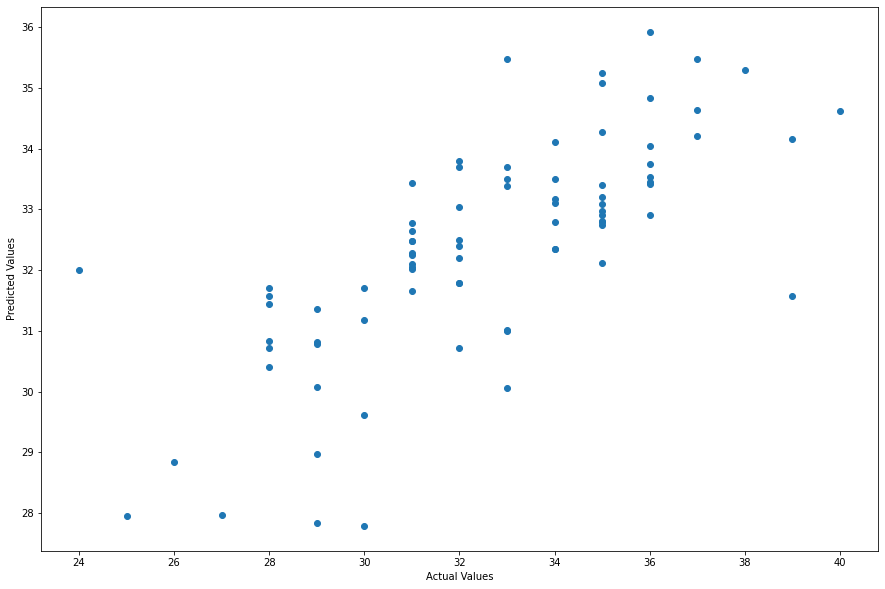

In [224]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test,elastic_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#### 3.6.1.2 Regression plot between actual and predicted values

Text(0, 0.5, 'Predicted Values')

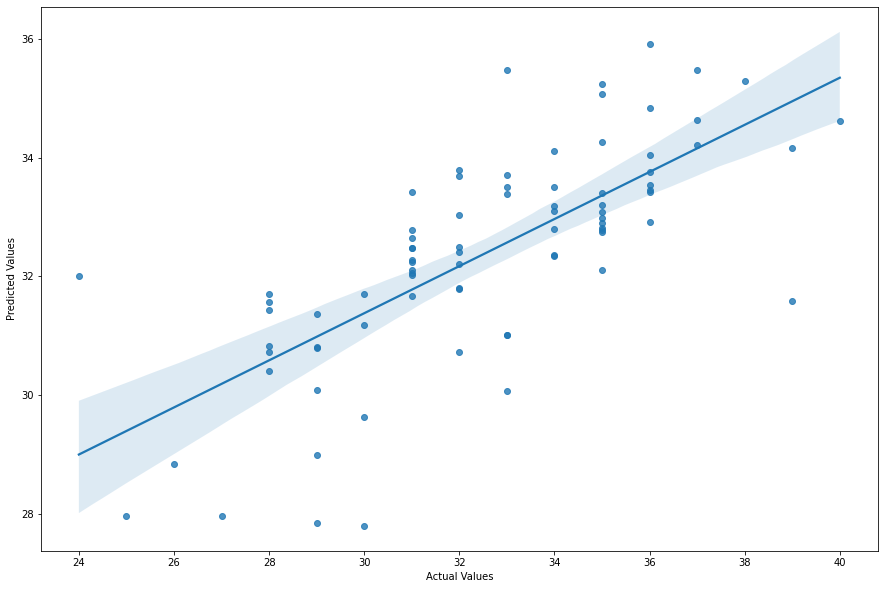

In [225]:
plt.figure(figsize=(15,10))
sns.regplot(Y_test,elastic_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#### Observation : Linear relationship so the model is good

In [227]:
elastic_residuals=Y_test-elastic_pred

In [228]:
elastic_residuals

24    -1.781375
6     -0.381391
153   -0.507300
211    2.253796
198    5.381095
         ...   
180    0.901659
5     -1.052666
56     1.955630
125   -1.706016
148    2.550742
Name: Temperature, Length: 81, dtype: float64

#### 3.6.1.3 Density Distribution 

<AxesSubplot:ylabel='Density'>

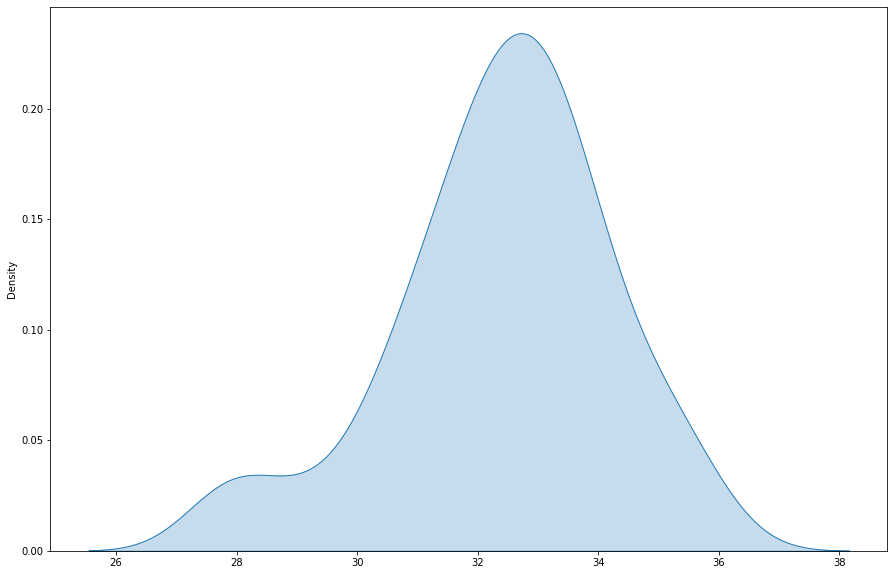

In [230]:
plt.figure(figsize=(15,10))
sns.kdeplot(elastic_pred,shade=True)


#### 3.6.1.4 Scatter plot between predicted values and residuals

Text(0, 0.5, 'Residuals ')

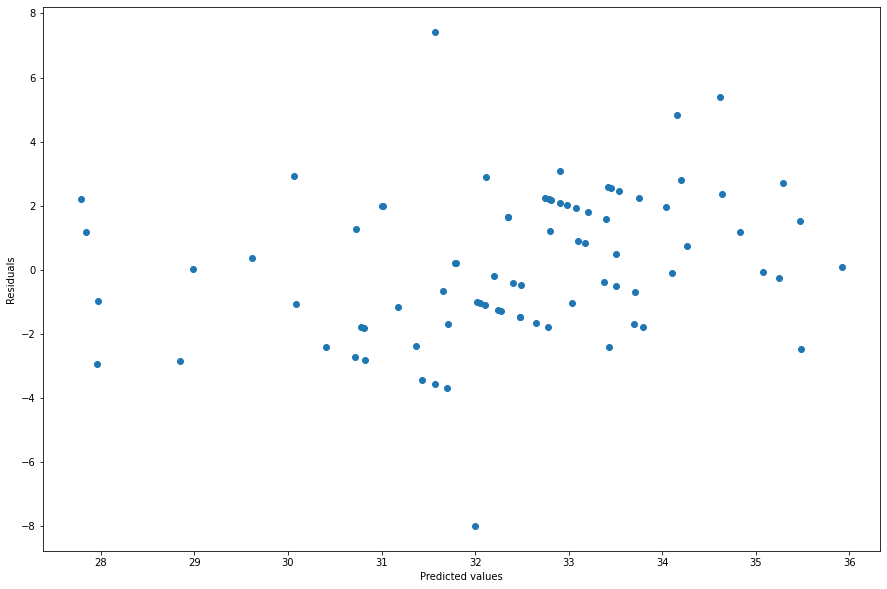

In [233]:
plt.figure(figsize=(15,10))
plt.scatter(elastic_pred,elastic_residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals ")

#### Observation : Uniform distribution

#### 3.6.2 Performance Metrics (Cost function's)

In [234]:


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,elastic_pred))
print(mean_absolute_error(Y_test,elastic_pred))
print(np.sqrt(mean_squared_error(Y_test,elastic_pred)))


5.446314578962403
1.8597985277652984
2.3337340420370105


#### 3.6.3 R Square and Adjusted R square error

In [235]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,elastic_pred)
score

0.49292933230350056

In [236]:
###Adjuested R square

1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.41209197948231946